<a href="https://colab.research.google.com/github/Saaj369/Sutherland-Hodgman-algorithm-Convex-Polygon-Intersection-/blob/main/ConvexPolygonIntersection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sutherland-Hodgman algorithm for Convex polygon intersection.

### This is a simple algorithm to perform intersection between two convex polygon. It proceeds like this.


1.   First make sure both polygons are convex and they are stored in Counter-Clockwise order.
2.   We choose a convex polygon (any one will work) and we try to clip the other polygon edges by each edge of the choosen polygon.
3.  That's it!





> Choice of Data Structure:
So how should we store the polygon? turns out the data structure we use to store polygon has impact on the performance of the algorithm and ease of use. Since the algorithm requires it to remove and insert verts in between, using a simple array may affect performance. Since a polygon is circular, it perfectly fits with the Circular Linked List. So we use that.



In [1]:
class node:
  """ The node for circular linked list """
  def __init__(self, data):
    self.data = data
    self.next = None

In [2]:
# Circular Linked List Implementation
class CircularLinkedList:
  def __init__(self):
    self.last = None
    self.count = 0

  def isEmpty(self):
    return self.last is None

  def insertAtBeginning(self, data):
    newNode = node(data)

    if self.isEmpty():
      newNode.next = newNode
      self.last = newNode
    else:
      newNode.next = self.last.next
      self.last.next = newNode
    self.count += 1

  def insertAtEnd(self, data):
    newNode = node(data)

    if self.isEmpty():
      newNode.next = newNode
      self.last = newNode
    else:
      newNode.next = self.last.next
      self.last.next = newNode
      self.last = newNode
    self.count += 1

  def display(self):
    if self.isEmpty():
      print("List is empty!!!")
      return
    print(f"Total nodes : {self.count}")
    current = self.last.next
    while True:
      print(current.data, end = "-> ")
      current = current.next
      if current == self.last.next:
        break

  def clear(self):
    self.last = None
    self.count = 0

  def delete(self, key):
    if self.isEmpty():
      return

    if self.last.next == self.last and self.last.data == key:
      self.last = None
      self.count = 0
      return

    current = self.last.next
    previous = self.last

    while True:
      if current.data == key:
        previous.next = current.next
        self.count -= 1
        break

      previous = current
      current = current.next
      if current == self.last.next:
        break


In [3]:
cl = CircularLinkedList()
cl.insertAtEnd(1)
cl.insertAtEnd(2)
cl.insertAtEnd(3)
cl.insertAtEnd(9)
cl.insertAtBeginning(0)
cl.insertAtEnd(4)
cl.insertAtEnd(7)
cl.insertAtEnd(5)
cl.display()

Total nodes : 8
0-> 1-> 2-> 3-> 9-> 4-> 7-> 5-> 

In [4]:
cl.delete(9)
cl.delete(7)
cl.display()

Total nodes : 6
0-> 1-> 2-> 3-> 4-> 5-> 

In [5]:
def toTheLeft(dataA, dataB, data):
  """
  Determines if a point 'data' is to the left of the directed line segment from 'dataA' to 'dataB'.

  Args:
    dataA (tuple): The starting point of the line segment (x1, y1).
    dataB (tuple): The ending point of the line segment (x2, y2).
    data (tuple): The point to check (x3, y3).

  Returns:
    bool: True if 'data' is to the left of or on the line, False otherwise.
  """
  x1, y1 = dataA
  x2, y2 = dataB
  x3, y3 = data

  cross_product = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

  return cross_product >= 0

def GetIntersection(dataA, dataB, dataC, dataD):
  """
  Calculates the intersection point of two line segments (dataA-dataB) and (dataC-dataD).

  Args:
    dataA (tuple): Start point of the first line segment (x1, y1).
    dataB (tuple): End point of the first line segment (x2, y2).
    dataC (tuple): Start point of the second line segment (x3, y3).
    dataD (tuple): End point of the second line segment (x4, y4).

  Returns:
    tuple or None: The intersection point (x, y) if it exists, otherwise None.
  """
  x1, y1 = dataA
  x2, y2 = dataB
  x3, y3 = dataC
  x4, y4 = dataD

  denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

  if denominator == 0:
    return None

  t_numerator = (x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)
  t = t_numerator / denominator

  intersect_x = x1 + t * (x2 - x1)
  intersect_y = y1 + t * (y2 - y1)

  return (intersect_x, intersect_y)

In [6]:
toTheLeft((1,1),(-1,-1),(0,1))

False

In [7]:
GetIntersection((-1,-1), (1,1), (1,1), (-1,-1))

In [8]:
class ConvexPolygon(CircularLinkedList):
  def __init__(self, verts:list):
    super().__init__()
    for vert in verts:
      self.insertAtEnd(vert)

  def Intersect(self, clipper_poly):
    """
    Clips this polygon (subject) against another polygon (clipper) using
    the Sutherland-Hodgman algorithm.
    Returns a new ConvexPolygon representing the intersection.
    Does not modify the original polygons.
    """
    # Convert subject polygon to a list of vertices for easier processing
    subject_verts = []
    if not self.isEmpty():
      current = self.last.next
      for _ in range(self.count):
        subject_verts.append(current.data)
        current = current.next

    # If the subject polygon is empty, the intersection is empty
    if not subject_verts:
      return ConvexPolygon([])

    # Convert clipper polygon to a list of vertices
    clipper_verts = []
    if not clipper_poly.isEmpty():
      current = clipper_poly.last.next
      for _ in range(clipper_poly.count):
        clipper_verts.append(current.data)
        current = current.next

    # If the clipper polygon is empty, the intersection is empty
    if not clipper_verts:
      return ConvexPolygon([])

    # Initialize the current list of subject vertices to be clipped
    output_polygon_verts = list(subject_verts) # Start with the original subject vertices

    # Iterate through each edge of the clipper polygon
    # Each edge of the clipper becomes a clipping line
    for i in range(len(clipper_verts)):
      clip_p1 = clipper_verts[i]
      clip_p2 = clipper_verts[(i + 1) % len(clipper_verts)] # Next vertex, wrapping around

      new_output_polygon_verts = []

      # If at any point the polygon becomes empty, no intersection exists
      if not output_polygon_verts:
        break

      # Iterate through each edge (s_prev, s_current) of the current output_polygon_verts
      for j in range(len(output_polygon_verts)):
        s_prev = output_polygon_verts[j]
        s_current = output_polygon_verts[(j + 1) % len(output_polygon_verts)]

        # Determine if s_prev and s_current are 'inside' (to the left) of the clipping line (clip_p1 -> clip_p2)
        s_prev_is_inside = toTheLeft(clip_p1, clip_p2, s_prev)
        s_current_is_inside = toTheLeft(clip_p1, clip_p2, s_current)

        if s_prev_is_inside and s_current_is_inside:
          # Case 1: Both points are inside, add s_current
          new_output_polygon_verts.append(s_current)
        elif s_prev_is_inside and not s_current_is_inside:
          # Case 2: s_prev is inside, s_current is outside.
          # Add intersection point (prev->current crosses out)
          intersection_point = GetIntersection(s_prev, s_current, clip_p1, clip_p2)
          if intersection_point is not None:
            new_output_polygon_verts.append(intersection_point)
        elif not s_prev_is_inside and s_current_is_inside:
          # Case 3: s_prev is outside, s_current is inside.
          # Add intersection point (prev->current crosses in), then add s_current
          intersection_point = GetIntersection(s_prev, s_current, clip_p1, clip_p2)
          if intersection_point is not None:
            new_output_polygon_verts.append(intersection_point)
          new_output_polygon_verts.append(s_current)
        # Case 4: Both points are outside, add nothing

      # After processing one clipper edge, the new list of vertices becomes the subject for the next clipper edge
      output_polygon_verts = new_output_polygon_verts

    # Construct the final ConvexPolygon from the last set of clipped vertices
    return ConvexPolygon(output_polygon_verts)


# Testing the algorithm



In [22]:
pentagon_verts = [
    (2.0, 0.0),
    (4.0, 1.0),
    (3.5, 3.5),
    (0.5, 3.5),
    (0.0, 1.0)
]
poly_pentagon = ConvexPolygon(pentagon_verts)
print('\nPentagon vertices:')
poly_pentagon.display()

square_verts = [
    (1.0, 0.0),
    (3.0, 0.0),
    (3.0, 2.0),
    (1.0, 2.0)
]
poly_square = ConvexPolygon(square_verts)
print('\nSquare vertices:')
poly_square.display()


Pentagon vertices:
Total nodes : 5
(2.0, 0.0)-> (4.0, 1.0)-> (3.5, 3.5)-> (0.5, 3.5)-> (0.0, 1.0)-> 
Square vertices:
Total nodes : 4
(1.0, 0.0)-> (3.0, 0.0)-> (3.0, 2.0)-> (1.0, 2.0)-> 

In [23]:
print('\n--- Calculating Intersection ---')
poly_intersection = poly_pentagon.Intersect(poly_square)

print('\nIntersection Polygon vertices:')
poly_intersection.display()


--- Calculating Intersection ---

Intersection Polygon vertices:
Total nodes : 5
(1.0, 0.5)-> (2.0, 0.0)-> (3.0, 0.5)-> (3.0, 2.0)-> (1.0, 2.0)-> 

In [26]:
"""These Plot functions are generated using Gemini..."""
import matplotlib.pyplot as plt
def plot_polygon(poly, color='blue', label='', ax=None):
  """
  Plots a ConvexPolygon object.

  Args:
    poly (ConvexPolygon): The polygon to plot.
    color (str): The color for the polygon edges and fill.
    label (str): The label for the polygon.
    ax (matplotlib.axes.Axes): The axes object to plot on. If None, uses current axes.
  """
  x_coords = []
  y_coords = []

  if poly.isEmpty():
    print(f"Cannot plot empty polygon: {label}")
    return

  current = poly.last.next
  while True:
    x_coords.append(current.data[0])
    y_coords.append(current.data[1])
    current = current.next
    if current == poly.last.next:
      break

  # Close the polygon by appending the first vertex again
  x_coords.append(x_coords[0])
  y_coords.append(y_coords[0])

  if ax is None:
      ax = plt.gca() # Get current axes if not provided

  # Plot the edges
  ax.plot(x_coords, y_coords, color=color, label=label)
  # Fill the polygon
  ax.fill(x_coords, y_coords, color=color, alpha=0.3)

print("plot_polygon function defined and updated to accept 'ax' argument.")

plot_polygon function defined and updated to accept 'ax' argument.


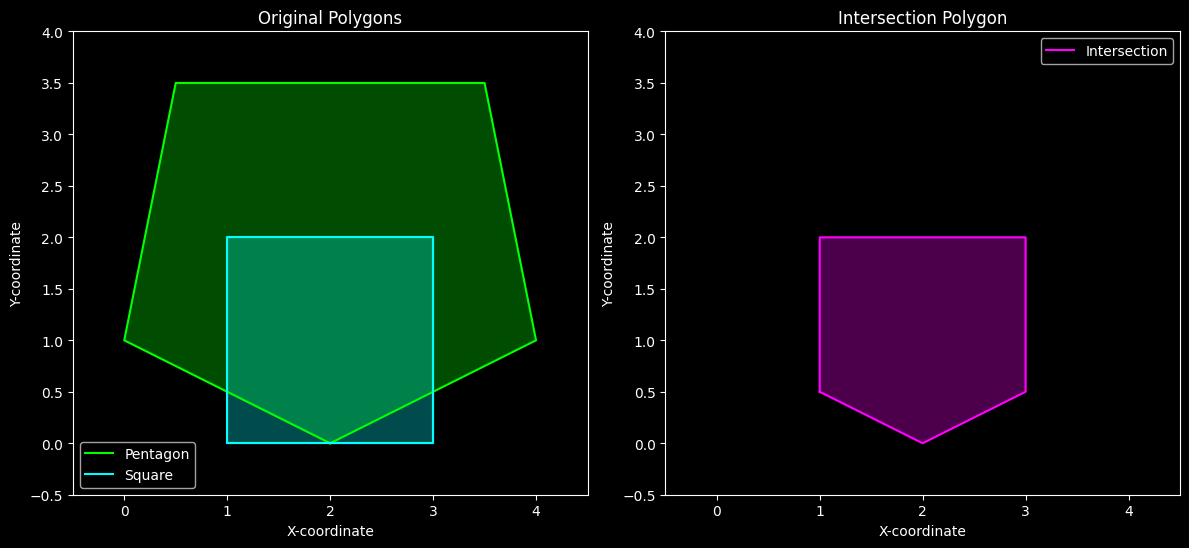

In [27]:
import matplotlib.pyplot as plt

# 2. Set the matplotlib style to 'dark_background'
plt.style.use('dark_background')

# 3. Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- First Subplot: Original Polygons ---
# 4. Plot poly_pentagon
plot_polygon(poly_pentagon, color='lime', label='Pentagon', ax=ax1)
# 5. Plot poly_square
plot_polygon(poly_square, color='cyan', label='Square', ax=ax1)
# 6. Set the title of the first subplot
ax1.set_title('Original Polygons')
ax1.set_xlabel('X-coordinate')
ax1.set_ylabel('Y-coordinate')

# --- Second Subplot: Intersection Polygon ---
# 7. Plot poly_intersection
plot_polygon(poly_intersection, color='magenta', label='Intersection', ax=ax2)
# 8. Set the title of the second subplot
ax2.set_title('Intersection Polygon')
ax2.set_xlabel('X-coordinate')
ax2.set_ylabel('Y-coordinate')

# --- Determine consistent axis limits ---
all_x = []
all_y = []

# Helper to extract coords from a ConvexPolygon object
def get_polygon_coords(poly_obj):
    coords_x = []
    coords_y = []
    if not poly_obj.isEmpty():
        current = poly_obj.last.next
        for _ in range(poly_obj.count):
            coords_x.append(current.data[0])
            coords_y.append(current.data[1])
            current = current.next
    return coords_x, coords_y

pentagon_x, pentagon_y = get_polygon_coords(poly_pentagon)
square_x, square_y = get_polygon_coords(poly_square)
intersection_x, intersection_y = get_polygon_coords(poly_intersection)

all_x.extend(pentagon_x)
all_x.extend(square_x)
all_x.extend(intersection_x)

all_y.extend(pentagon_y)
all_y.extend(square_y)
all_y.extend(intersection_y)

min_x = min(all_x) - 0.5
max_x = max(all_x) + 0.5
min_y = min(all_y) - 0.5
max_y = max(all_y) + 0.5

# 9. Set these limits for both subplots
ax1.set_xlim(min_x, max_x)
ax1.set_ylim(min_y, max_y)
ax2.set_xlim(min_x, max_x)
ax2.set_ylim(min_y, max_y)
ax1.set_aspect('equal', adjustable='box') # Ensure aspect ratio is equal
ax2.set_aspect('equal', adjustable='box') # Ensure aspect ratio is equal

# 10. Add legends to both subplots
ax1.legend()
ax2.legend()

# 11. Use plt.tight_layout()
plt.tight_layout()

# 12. Display the plot
plt.show()